In [1]:
%%capture
%cd ..

In [2]:
import pandas as pd
from utils import constants as cs
import matplotlib.pyplot as plt
import os

In [3]:
ds_root = 'dataset/hi'


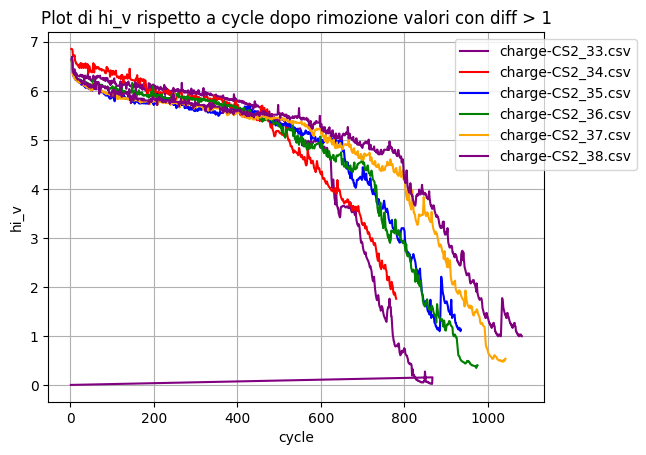

In [13]:
# Lista dei colori che vuoi utilizzare per le curve
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Inizializza il plot
plt.figure()

# Lista per i nomi dei file
file_names = []

# Loop attraverso i file in ds_root
for i, file_name in enumerate(os.listdir(ds_root)):
    file_path = os.path.join(ds_root, file_name)
    
    # Leggi il DataFrame dal file
    df = pd.read_csv(file_path)
    
    # Calcola la differenza consecutiva per la colonna 'hi_v'
    diff_hi_v = df['hi_v'].diff()
    
    # Applica una condizione per filtrare i dati
    selected_rows = df[abs(diff_hi_v) <= .2]
    
    # Traccia la curva utilizzando un colore dalla lista colors
    plt.plot(selected_rows['cycle'], selected_rows['hi_v'], label=f'File {file_name}', linestyle='-', color=colors[i-1])
    
    # Aggiungi il nome del file alla lista
    file_names.append(file_name)

# Aggiungi titoli e legenda
plt.title('Plot di hi_v rispetto a cycle dopo rimozione valori con diff > 1')
plt.xlabel('cycle')
plt.ylabel('hi_v')
plt.grid(True)

# Sposta la legenda in alto a destra senza che esca dalla figura
plt.legend(file_names, loc='upper right', bbox_to_anchor=(1.2, 1.))

plt.show()

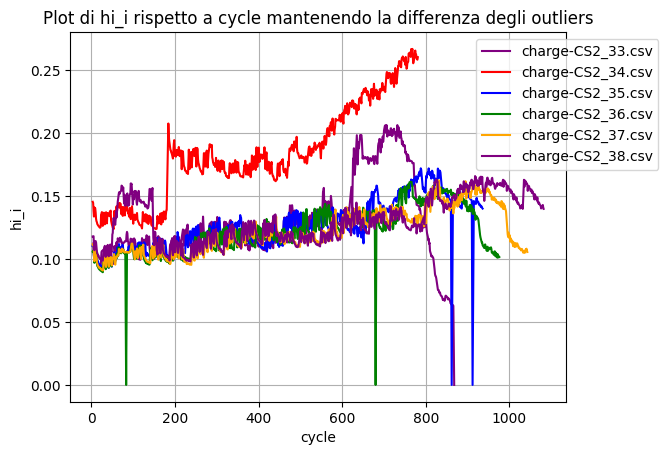

In [18]:
# Lista dei colori che vuoi utilizzare per le curve
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Inizializza il plot
plt.figure()

# Lista per i nomi dei file
file_names = []

# Loop attraverso i file in ds_root
for i, file_name in enumerate(os.listdir(ds_root)):
    file_path = os.path.join(ds_root, file_name)
    
    # Leggi il DataFrame dal file
    df = pd.read_csv(file_path)
    
    # Calcola la differenza consecutiva per la colonna 'hi_i'
    diff_hi_i = df['hi_i'].diff()
    
    # Applica una condizione per filtrare i dati
    selected_rows = df[abs(diff_hi_i) <= .01]
    
    # Traccia la curva utilizzando un colore dalla lista colors
    plt.plot(selected_rows['cycle'], selected_rows['hi_i'], label=f'File {file_name}', linestyle='-', color=colors[i-1])
    
    # Aggiungi il nome del file alla lista
    file_names.append(file_name)

# Aggiungi titoli e legenda
plt.title('Plot di hi_i rispetto a cycle mantenendo la differenza degli outliers')
plt.xlabel('cycle')
plt.ylabel('hi_i')
plt.grid(True)

# Sposta la legenda in alto a destra senza che esca dalla figura
plt.legend(file_names, loc='upper right', bbox_to_anchor=(1.2, 1.))

plt.show()
